In [103]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [104]:
#Task 1
import zipfile

In [105]:
zipfile.ZipFile('names.zip').extractall('.')

In [106]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 489A-D9CF

 Directory of C:\Users\hassi\DataMining_Projects\Project 1

09/03/2023  01:14 AM    <DIR>          .
09/02/2023  08:50 PM    <DIR>          ..
09/02/2023  09:03 PM    <DIR>          .ipynb_checkpoints
09/03/2023  12:15 AM         8,652,542 allyears.csv.gz
09/02/2023  09:02 PM    <DIR>          names
08/22/2023  06:23 PM         8,528,645 names.zip
09/02/2023  08:49 PM           584,997 Project 1-1.pdf
09/03/2023  01:14 AM           289,487 project1.ipynb
               4 File(s)     18,055,671 bytes
               4 Dir(s)  709,849,784,320 bytes free


In [107]:
ls names

 Volume in drive C is Acer
 Volume Serial Number is 489A-D9CF

 Directory of C:\Users\hassi\DataMining_Projects\Project 1\names

09/02/2023  09:02 PM    <DIR>          .
09/03/2023  01:14 AM    <DIR>          ..
09/03/2023  01:15 AM           316,364 NationalReadMe.pdf
09/03/2023  01:15 AM            24,933 yob1880.txt
09/03/2023  01:15 AM            24,065 yob1881.txt
09/03/2023  01:15 AM            26,559 yob1882.txt
09/03/2023  01:15 AM            26,002 yob1883.txt
09/03/2023  01:15 AM            28,670 yob1884.txt
09/03/2023  01:15 AM            28,625 yob1885.txt
09/03/2023  01:15 AM            29,822 yob1886.txt
09/03/2023  01:15 AM            29,531 yob1887.txt
09/03/2023  01:15 AM            33,064 yob1888.txt
09/03/2023  01:15 AM            32,297 yob1889.txt
09/03/2023  01:15 AM            33,621 yob1890.txt
09/03/2023  01:15 AM            33,186 yob1891.txt
09/03/2023  01:15 AM            36,542 yob1892.txt
09/03/2023  01:15 AM            35,433 yob1893.txt
09/03/2023  01:1

In [108]:
# Task 2
file_path = 'names/yob2011.txt'
df = pd.read_csv(file_path, names=['name', 'sex', 'number'])
df['year'] = 2011

In [109]:
df

,name,sex,number,year
0,Sophia,F,21842,2011
1,Isabella,F,19910,2011
2,Emma,F,18803,2011
3,Olivia,F,17322,2011
4,Ava,F,15503,2011
...,...,...,...,...
33903,Zylar,M,5,2011
33904,Zylas,M,5,2011
33905,Zyran,M,5,2011
33906,Zyshawn,M,5,2011


In [110]:
#Task 3
dfs = []
for year in range(1880, 2019):
    file_path = f'names/yob{year}.txt'
    df = pd.read_csv(file_path, names=['name', 'sex', 'number'])
    df['year'] = year
    dfs.append(df)
    
allyears = pd.concat(dfs, ignore_index=True)

In [111]:
allyears.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   number  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [112]:
allyears.to_csv('allyears.csv.gz', index=False)

In [113]:
#Task 4
allyears = pd.read_csv('allyears.csv.gz')
allyears_indexed = allyears.set_index(['sex', 'name', 'year'])
allyears_indexed = allyears_indexed.sort_index()

C:\Users\hassi\AppData\Local\Temp\ipykernel_28420\4128344314.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  mary_data = allyears_indexed.loc[('F', 'Mary')]


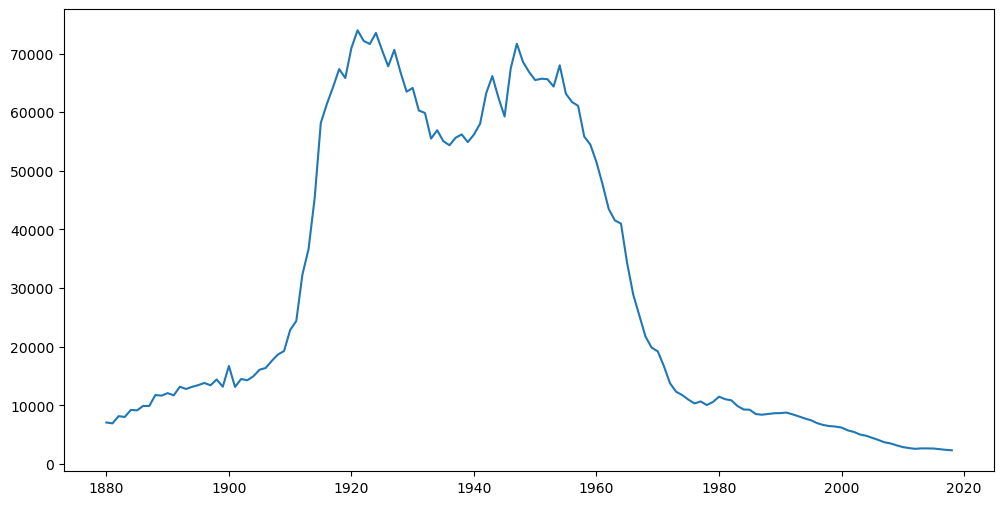

In [114]:
allyears_indexed = pd.read_csv('allyears.csv.gz', index_col=['sex', 'name', 'year'])

# Get the data for name "Mary" and sex "F"
mary_data = allyears_indexed.loc[('F', 'Mary')]

# Plot the popularity of the name "Mary" over the years
pp.figure(figsize=(12, 6))
pp.plot(mary_data.index, mary_data['number'])
pp.show()

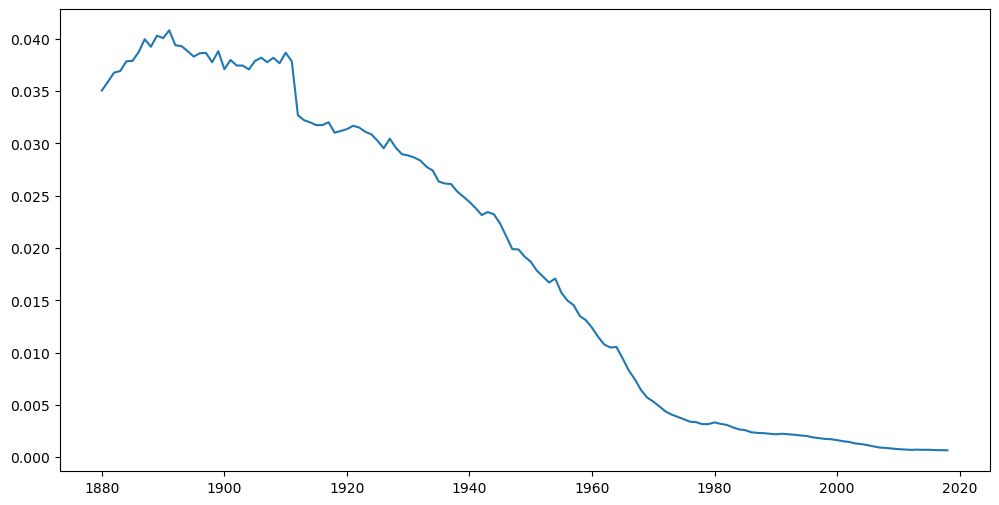

In [115]:
total_births_per_year = allyears_indexed.groupby('year')['number'].sum()
normalized_mary_data = mary_data['number'] / total_births_per_year[mary_data.index.get_level_values('year')]
pp.figure(figsize=(12, 6))
pp.plot(normalized_mary_data.index, normalized_mary_data.values)
pp.show()

In [116]:
#Task 5
def plotname(sex, names):
    all_names_data = pd.DataFrame()
    
    for name in names:
        name_data = allyears_indexed.loc[(sex, name)]
        all_names_data[name] = name_data['number']

    pp.figure(figsize=(16, 4))
    for name in names:
        pp.plot(all_names_data.index, all_names_data[name], label=name)
        
    pp.legend()
    pp.show()
    
def comparenames(sex, names):
    plotname(sex, names)

C:\Users\hassi\AppData\Local\Temp\ipykernel_28420\2528925305.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  name_data = allyears_indexed.loc[(sex, name)]
C:\Users\hassi\AppData\Local\Temp\ipykernel_28420\2528925305.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  name_data = allyears_indexed.loc[(sex, name)]
C:\Users\hassi\AppData\Local\Temp\ipykernel_28420\2528925305.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  name_data = allyears_indexed.loc[(sex, name)]
C:\Users\hassi\AppData\Local\Temp\ipykernel_28420\2528925305.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  name_data = allyears_indexed.loc[(sex, name)]


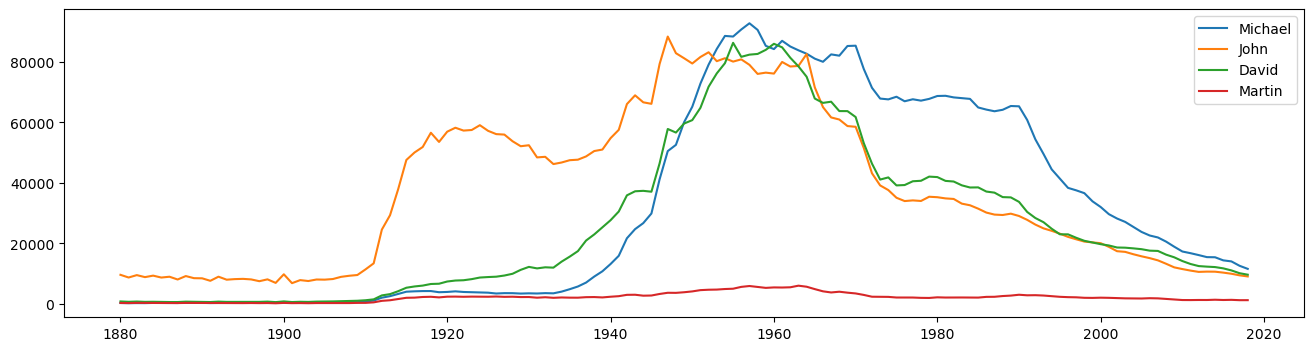

In [117]:
comparenames('M', ['Michael', 'John', 'David', 'Martin'])

C:\Users\hassi\AppData\Local\Temp\ipykernel_28420\2528925305.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  name_data = allyears_indexed.loc[(sex, name)]
C:\Users\hassi\AppData\Local\Temp\ipykernel_28420\2528925305.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  name_data = allyears_indexed.loc[(sex, name)]
C:\Users\hassi\AppData\Local\Temp\ipykernel_28420\2528925305.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  name_data = allyears_indexed.loc[(sex, name)]
C:\Users\hassi\AppData\Local\Temp\ipykernel_28420\2528925305.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  name_data = allyears_indexed.loc[(sex, name)]


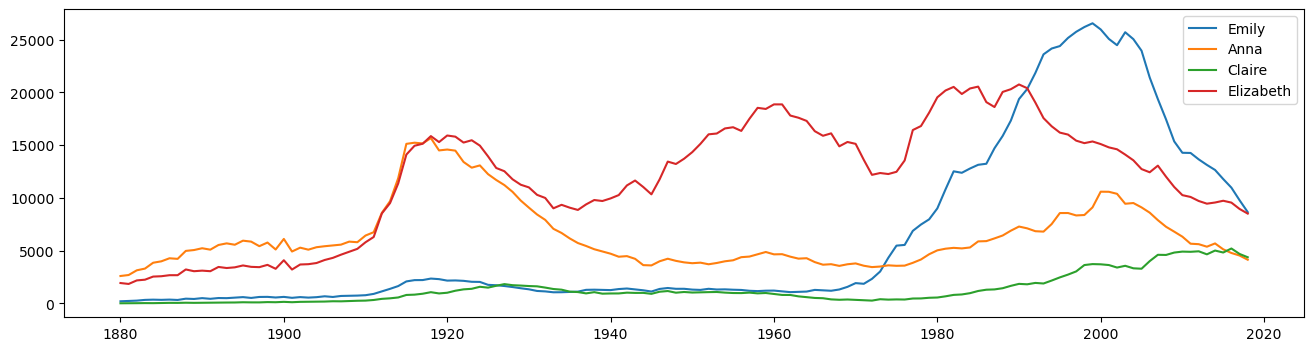

In [118]:
comparenames('F', ['Emily', 'Anna', 'Claire', 'Elizabeth'])